In [998]:
from utils import *
from ANN import NeuralNetwork
import numpy as np

# Clasificarea irisilor in functie de specie - ANN my code

### Pasul 1 - incarcarea datelor si afisarea distributiei lor

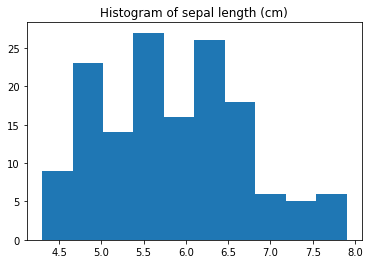

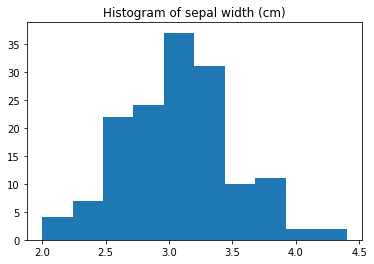

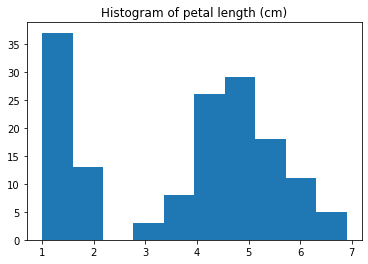

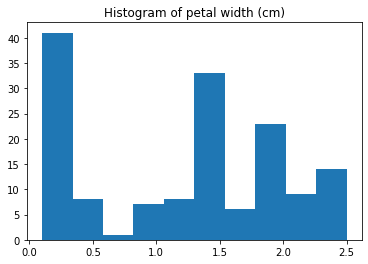

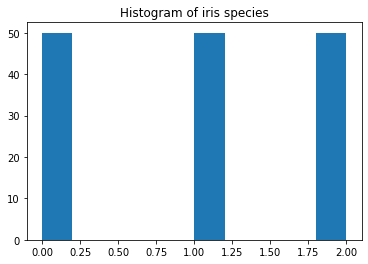

In [999]:
from sklearn.datasets import load_iris
data = load_iris()
inputs = np.array(data['data'])
outputs = np.array(data['target'])
outputNames = data['target_names']
featureNames = list(data['feature_names'])
features = [[feat[i] for feat in inputs] for i in range(len(featureNames))]
inputs = [[features[i][j] for i in range(len(featureNames))] for j in range(len(inputs))]

# plot the data distribution
for i in range(len(featureNames)):
    plot_data_histograms(features[i], featureNames[i])
plot_data_histograms(outputs, 'iris species')

### Pasul 2 - Impartirea datelor in date de antrenament si date de validare si normalizarea datelor

In [1000]:
# impratirea datelor in date de antrenament si date de validare
train_inputs, train_outputs, validation_inputs, validation_outputs = split_data_into_training_and_validation(inputs, outputs, 0.8)

# normalizarea datelor
train_inputs, validation_inputs = normalisation(train_inputs, validation_inputs)

### Pasul 3 - Invatare model

In [1001]:
classifier = NeuralNetwork()
classifier.fit(train_inputs, train_outputs, learning_rate=0.0000001, no_epochs=20)

### Pasul 4 - Testarea datelor de validare

In [1002]:
validation_inputs = validation_inputs
predicted_validation_outputs = classifier.predict(validation_inputs)

### Pasul 5 - Calculul acuratetii si afisarea matricei de confuzie

Accuracy - by tool: 0.4666666666666667


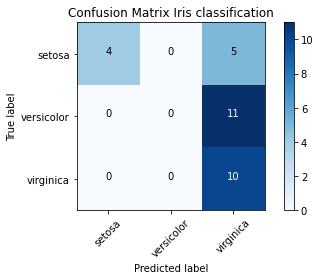

In [1003]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calculul acuratetii
accuracy = accuracy_score(validation_outputs, predicted_validation_outputs)
print('Accuracy - by tool:', accuracy)

# afisarea matricei de confuzie
cm = confusion_matrix(validation_outputs, predicted_validation_outputs)
plot_confusion_matrix(cm, outputNames, 'Iris classification')